In [1]:
%matplotlib inline
import os
import sys
import itertools
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import HTML



# Integrated Line Strength and Temperature

In [76]:
def get_temperatures_considered():
    temperatures = [100, 200, 300]
    return sorted(temperatures)


def get_fpaths(hitran_year, temperatures, oldcode = False):
    directory = '/nuwa_cluster/home/jackyu/radiation/crd/\
integrated_line_strength/examples/CRD/01_H2O_H{year}_t{temperature}' + ('_oldcode' if oldcode else '')
    filename = 'LS_H2O_{year}_t{temperature}.dat'
    fpaths = [os.path.join(directory.format(year = hitran_year, \
                                            temperature = t), \
                           filename.format(year = hitran_year, \
                                           temperature = t)) \
              for t in temperatures]
    return fpaths



def load_linestrength_output(fpath):
    '''
    read .dat output file from linestrenght code into DataFrame
    '''
    df = pd.read_csv(fpath,\
                    sep = r'\s+', header = None,
                    usecols = (1, 3, 4), index_col = 0,
                    names = ['V1', 'num_of_lines', 'integrated_intensity'])
    
    return df



def get_iLS(hitran_year, temperatures, oldcode = False):
    dfs = [load_linestrength_output(fpath) \
       for fpath in get_fpaths(hitran_year, Ts, oldcode = oldcode)]
    
    df = pd.concat([df['integrated_intensity'] for df in dfs],
                   axis = 1,
                   keys = Ts)
    
    df.columns.names = ['temperature']
    return df






In [53]:
Ts = get_temperatures_considered()

### CRD's HITRAN 2008

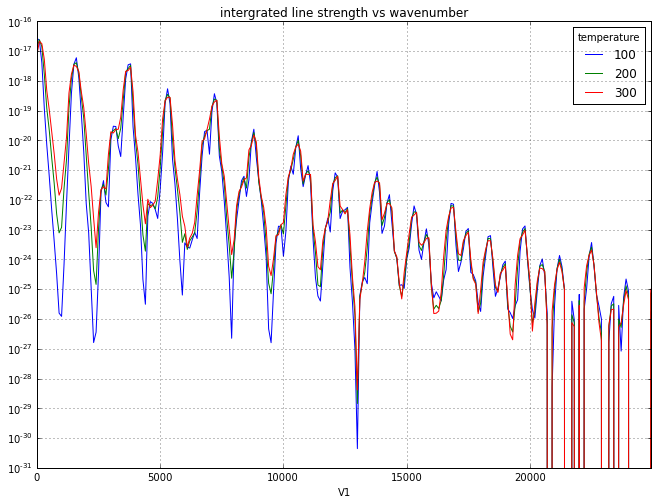

In [69]:
get_iLS(2008, Ts).plot(figsize = (11, 8), 
                       logy = True,
                       grid = True,
                       title = 'intergrated line strength vs wavenumber')

### CRD's HITRAN 2012

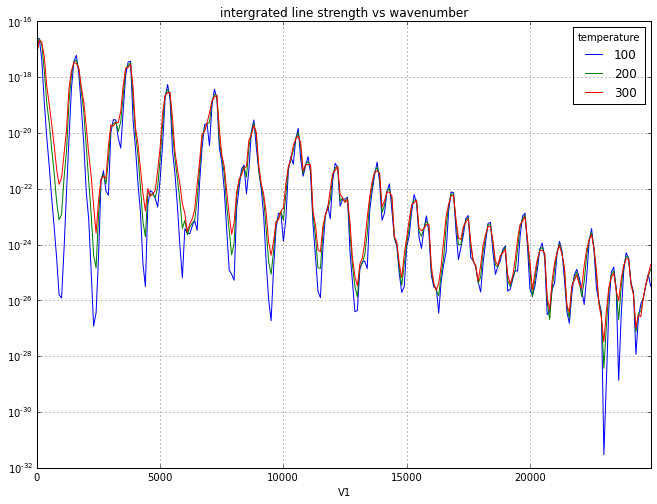

In [79]:
get_iLS(2012, Ts).plot(figsize = (11, 8), 
                       logy = True, 
                       grid = True,
                       title = 'intergrated line strength vs wavenumber')

#### using code attached in email: 04_Code_Integrated Line Strength.f

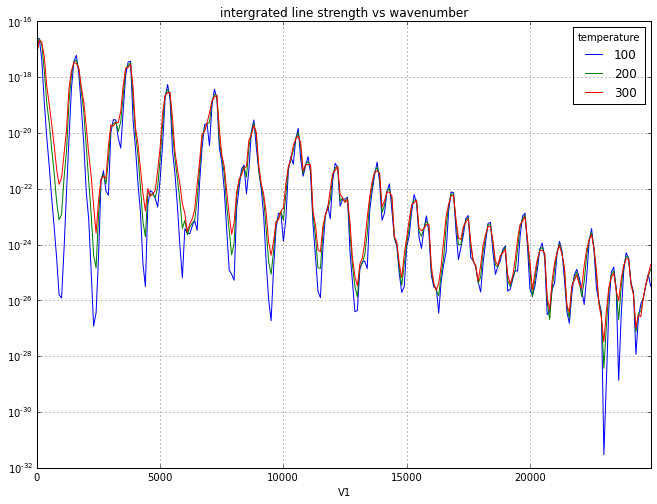

In [78]:
get_iLS(2012, Ts, oldcode=True).plot(figsize = (11, 8), 
                       logy = True, 
                       grid = True,
                       title = 'intergrated line strength vs wavenumber')

In [80]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')